In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sn 
import scipy
import mne
import os
import pandas as pd
import pickle
import numpy as np 
import mne 
import scipy
from scipy import io

In [2]:
PATH_ = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\SharpWaveAnalysis\\preprocessed\\"

In [3]:
files = os.listdir(PATH_)

In [4]:
def get_arr(measure_con, measure_ips):
    coord_ECOG = []; coord_STN = []
    p_ECOG_CON = []; p_ECOG_IPS = []
    p_STN_CON = []; p_STN_IPS = []
    for f in files:
        if "ECOG" in f: 
            continue
        res = np.load(os.path.join(PATH_, f), allow_pickle=True)
        if res["coords"][0] > 30:
            continue
        
        p_STN_CON.append(res[measure_con])
        p_STN_IPS.append(res[measure_ips])
        coord_STN.append(res["coords"])
        
    for f in files:
        if "STN" in f: 
            continue
        res = np.load(os.path.join(PATH_, f), allow_pickle=True)
        
        p_ECOG_CON.append(res[measure_con])
        p_ECOG_IPS.append(res[measure_ips])
        coord_ECOG.append(res["coords"])
    return np.array(coord_ECOG), np.array(coord_STN), np.array(p_ECOG_CON), np.array(p_ECOG_IPS), np.array(p_STN_CON), np.array(p_STN_IPS)

In [5]:
faces = io.loadmat('faces.mat')
Vertices = io.loadmat('Vertices.mat')
grid = io.loadmat('grid.mat')['grid']
stn_surf = io.loadmat('STN_surf.mat')
x_ = stn_surf['vertices'][::2,0]
y_ = stn_surf['vertices'][::2,1]
x_ecog = Vertices['Vertices'][::1,0]
y_ecog = Vertices['Vertices'][::1,1]
x_stn = stn_surf['vertices'][::1,0]
y_stn = stn_surf['vertices'][::1,1]

In [6]:
def plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit="", meas=""):
    height_STN = 1
    height_ECOG = 2.5*height_STN
    fig, axes = plt.subplots(2,2, facecolor=(0,0,0), gridspec_kw={'height_ratios': [height_ECOG, height_STN]}, \
                             figsize=(14,9))#, dpi=300)
    for idx in range(2):
        axes[0, idx].scatter(x_ecog, y_ecog, c="gray", s=0.001)
        axes[1, idx].scatter(x_stn, y_stn, c="gray", s=0.001)
        
        if idx == 0: # CON
            pos_ecog = axes[0, idx].scatter(np.array(coord_ECOG)[:,0], \
                                        np.array(coord_ECOG)[:,1], c=p_ECOG_CON, s=10, alpha=0.8, cmap='viridis')

            c = p_STN_CON
            axes[0, idx].set_title(meas+'\ncontralateral performance', color='white')
        if idx == 1:
            pos_ecog = axes[0, idx].scatter(np.array(coord_ECOG)[:,0], \
                                        np.array(coord_ECOG)[:,1], c=p_ECOG_IPS, s=10, alpha=0.8, cmap='viridis')
            axes[0, idx].set_title(meas+'\nipsilateral performance', color='white')
            c = p_STN_IPS
        cbar_ecog = fig.colorbar(pos_ecog, ax=axes[0, idx]); #pos_ecog.set_clim(0,0.7); 
        cbar_ecog.set_label(unit, color="white")
        cbar_ecog.ax.tick_params(axis='y', color='white')
        cbar_ecog.ax.set_yticklabels(labels=np.round(cbar_ecog.get_ticks(),2),color='white')
        cbar_ecog.outline.set_edgecolor('white')

            
        #if len(c) == 4:
        #    c_restructure = [c[0], (c[0]+c[1])/2, (c[1]+c[2])/2, c[2]]
        #elif len(c) == 8:
        #    c_restructure = [c[0], (c[0]+c[1])/2, (c[1]+c[2])/2, c[2], 
        #                    c[4], (c[4]+c[5])/2, (c[5]+c[6])/2, c[6]]
        pos_stn = axes[1, idx].scatter(np.array(coord_STN)[:,0], np.abs(np.array(coord_STN)[:,1])*-1, c=c, s=10, alpha=0.8, cmap='viridis')
        cbar_stn = fig.colorbar(pos_stn, ax=axes[1, idx]); 
        #pos_stn.set_clim(0,0.7); cbar_stn.remove()
        cbar_stn.outline.set_edgecolor('white')
        cbar_stn.ax.set_yticklabels(labels=np.round(cbar_stn.get_ticks(),2),color='white')
        cbar_stn.set_label(unit, color="white")
        
        axes[0, idx].axes.set_aspect('equal', anchor='C')
        axes[0, idx].set_facecolor((0,0,0))
        axes[1, idx].axes.set_aspect('equal', anchor='C')
        axes[1, idx].set_facecolor((0,0,0))

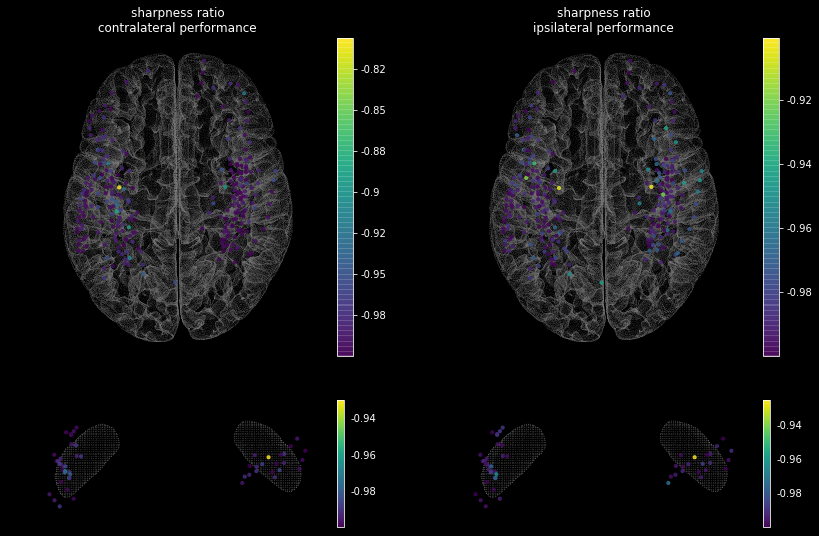

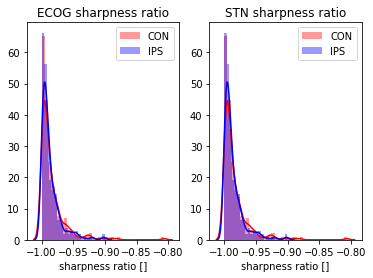

In [7]:
metric = "sharpness ratio"
label=""
coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS = \
    get_arr("sharpness_ratio_CON", "sharpness_ratio_IPS")
plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit=label, meas=metric)
plt.show()
plt.subplot(121)
sn.distplot(p_ECOG_CON, label='CON', color='red')
sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
plt.title("ECOG "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()
plt.subplot(122)
sn.distplot(p_ECOG_CON, label='CON', color='red')
sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
plt.title("STN "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()


### What is the ratio betwenn movement time percentage and troughs / peaks during movement and rest?
### $MovPeaksRatio = \frac{Movement rate label} {\frac{Peaks Movement}{Peaks No Movement)}}$

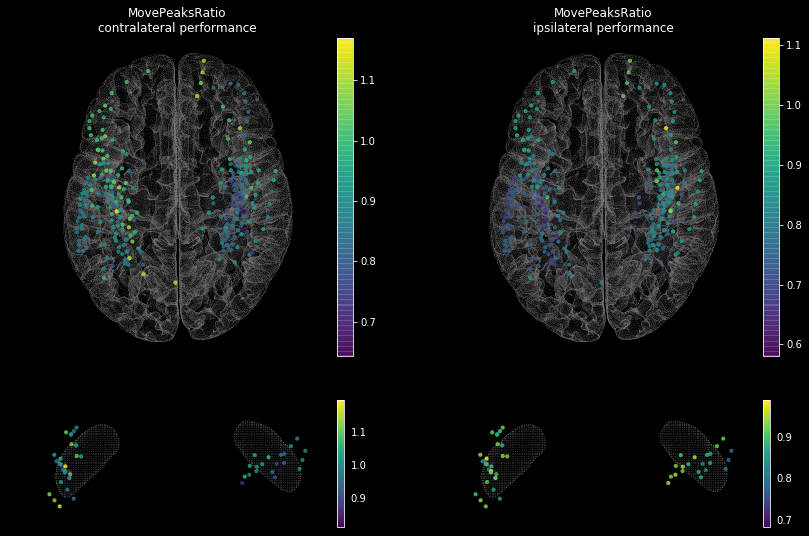

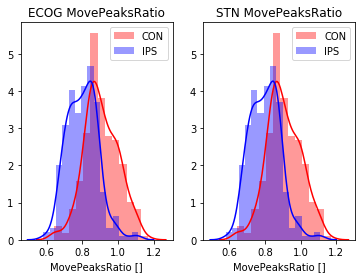

In [8]:
metric = "MovePeaksRatio"
label=""
coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS = \
    get_arr("ratio_con_all", "ratio_ips_all")

coord_ECOG, coord_STN, p_ECOG_CON_PEAKS, p_ECOG_IPS_PEAKS, p_STN_CON_PEAKS, p_STN_IPS_PEAKS = \
    get_arr("PEAKS_ratio_CON", "PEAKS_ratio_IPS")

p_ECOG_CON  /= p_ECOG_CON_PEAKS
p_ECOG_IPS /= p_ECOG_IPS_PEAKS
p_STN_CON /= p_STN_CON_PEAKS
p_STN_IPS /= p_STN_IPS_PEAKS

plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit=label, meas=metric)
plt.show()
plt.subplot(121)
sn.distplot(p_ECOG_CON, label='CON', color='red')
sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
plt.title("ECOG "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()
plt.subplot(122)
sn.distplot(p_ECOG_CON, label='CON', color='red')
sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
plt.title("STN "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()


### What is the ratio betwenn movement time percentage and troughs during movement and rest?
### $MovTroughsRatio = \frac{Movement rate label} {\frac{Troughs Movement}{Troughs No Movement)}}$

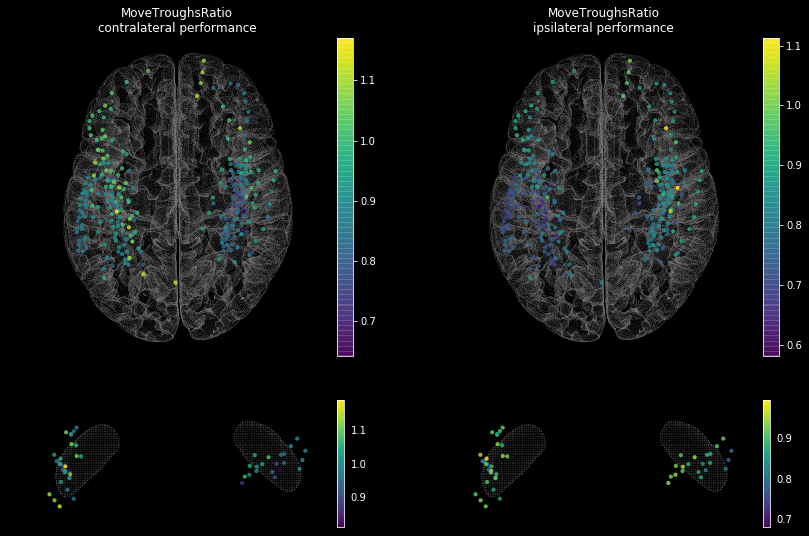

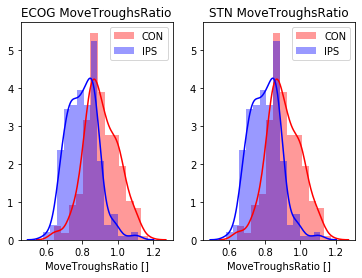

In [9]:
metric = "MoveTroughsRatio"
label=""
coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS = \
    get_arr("ratio_con_all", "ratio_ips_all")

coord_ECOG, coord_STN, p_ECOG_CON_TROUGHS, p_ECOG_IPS_TROUGHS, p_STN_CON_TROUGHS, p_STN_IPS_TROUGHS = \
    get_arr("TROUGHS_ratio_CON", "TROUGHS_ratio_IPS")

p_ECOG_CON  /= p_ECOG_CON_TROUGHS
p_ECOG_IPS /= p_ECOG_IPS_TROUGHS
p_STN_CON /= p_STN_CON_TROUGHS
p_STN_IPS /= p_STN_IPS_TROUGHS

plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit=label, meas=metric)
plt.show()
plt.subplot(121)
sn.distplot(p_ECOG_CON, label='CON', color='red')
sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
plt.title("ECOG "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()
plt.subplot(122)
sn.distplot(p_ECOG_CON, label='CON', color='red')
sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
plt.title("STN "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()


### Peak / Trough Ratio: 
### $\frac{PeaksMOV}{PeaksNoMov}$

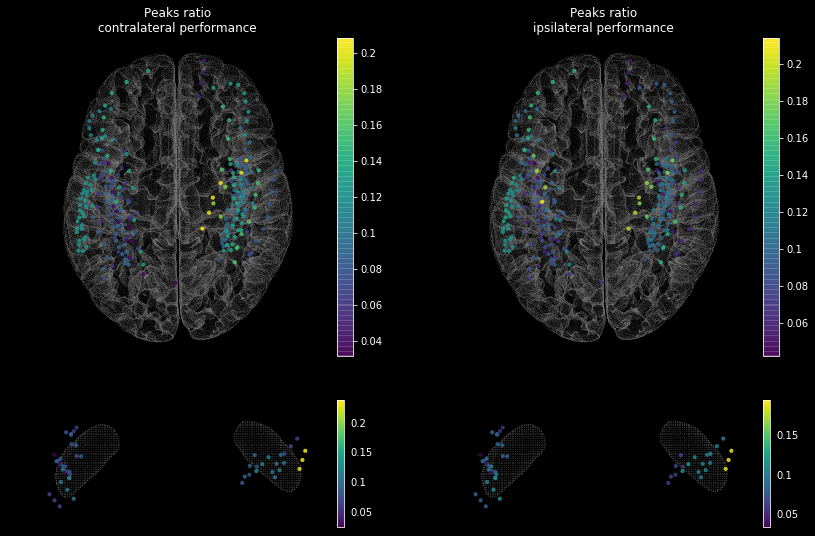

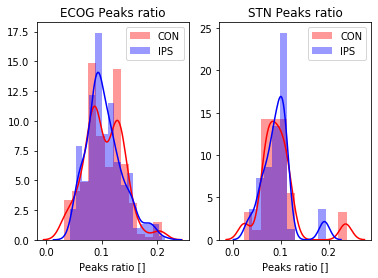

In [10]:
metric = "Peaks ratio"
label=""
coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS = \
    get_arr("PEAKS_ratio_CON", "PEAKS_ratio_IPS")
plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit=label, meas=metric)
plt.show()
plt.subplot(121)
sn.distplot(p_ECOG_CON, label='CON', color='red')
sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
plt.title("ECOG "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()
plt.subplot(122)
sn.distplot(p_STN_CON, label='CON', color='red')
sn.distplot(p_STN_IPS, label='IPS', color='blue')
plt.title("STN "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()


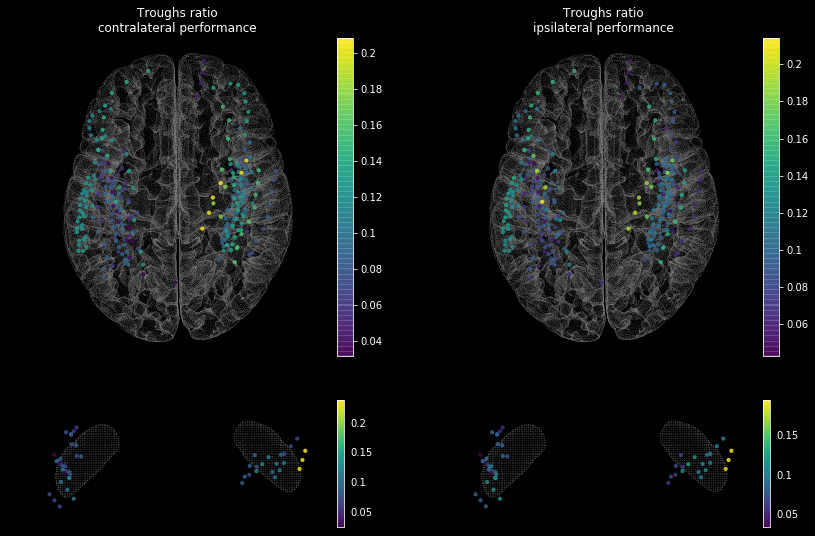

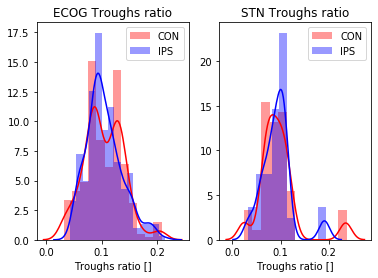

In [11]:
metric = "Troughs ratio"
label=""
coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS = \
    get_arr("TROUGHS_ratio_CON", "TROUGHS_ratio_IPS")
plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit=label, meas=metric)
plt.show()
plt.subplot(121)
sn.distplot(p_ECOG_CON, label='CON', color='red')
sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
plt.title("ECOG "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()
plt.subplot(122)
sn.distplot(p_STN_CON, label='CON', color='red')
sn.distplot(p_STN_IPS, label='IPS', color='blue')
plt.title("STN "+ metric)
plt.xlabel(metric + " [" + label+"]")
plt.legend()


In [12]:
def get_arr_TROUGHS(measure):
    coord_ECOG = []; coord_STN = []
    p_ECOG_CON = []; p_ECOG_IPS = []
    p_STN_CON = []; p_STN_IPS = []
    for f in files:
        if "ECOG" in f: 
            continue
        res = np.load(os.path.join(PATH_, f), allow_pickle=True)
        if res["coords"][0] > 30:
            continue
        
        p_STN_CON.append(res["TROUGHS_CON"][measure])
        p_STN_IPS.append(res["TROUGHS_IPS"][measure])
        coord_STN.append(res["coords"])
        
    for f in files:
        if "STN" in f: 
            continue
        res = np.load(os.path.join(PATH_, f), allow_pickle=True)
        
        p_ECOG_CON.append(res["TROUGHS_CON"][measure])
        p_ECOG_IPS.append(res["TROUGHS_IPS"][measure])
        coord_ECOG.append(res["coords"])
    return coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS

def get_arr_PEAKS(measure):
    coord_ECOG = []; coord_STN = []
    p_ECOG_CON = []; p_ECOG_IPS = []
    p_STN_CON = []; p_STN_IPS = []
    for f in files:
        if "ECOG" in f: 
            continue
        res = np.load(os.path.join(PATH_, f), allow_pickle=True)
        if res["coords"][0] > 30:
            continue
        
        p_STN_CON.append(res["PEAKS_CON"][measure])
        p_STN_IPS.append(res["PEAKS_IPS"][measure])
        coord_STN.append(res["coords"])
        
    for f in files:
        if "STN" in f: 
            continue
        res = np.load(os.path.join(PATH_, f), allow_pickle=True)
        
        p_ECOG_CON.append(res["PEAKS_CON"][measure])
        p_ECOG_IPS.append(res["PEAKS_IPS"][measure])
        coord_ECOG.append(res["coords"])
    return coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS

### Dkl(mov, no mov) Analysis for every of the consecutive plots 

### Troughs

In [15]:
res = np.load(os.path.join(PATH_, files[0]), allow_pickle=True)

('sharpness', 'mV')


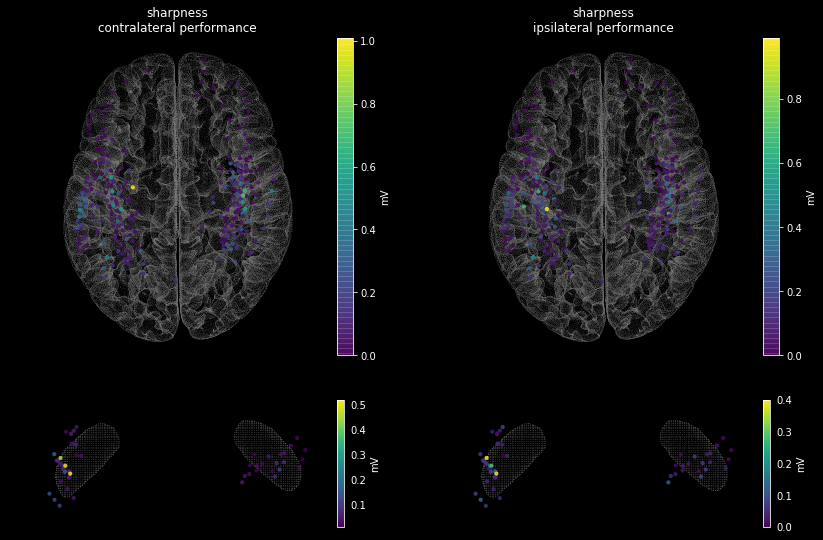

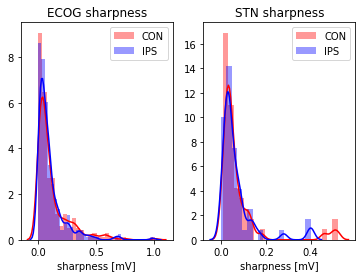

('trough', 'mV')


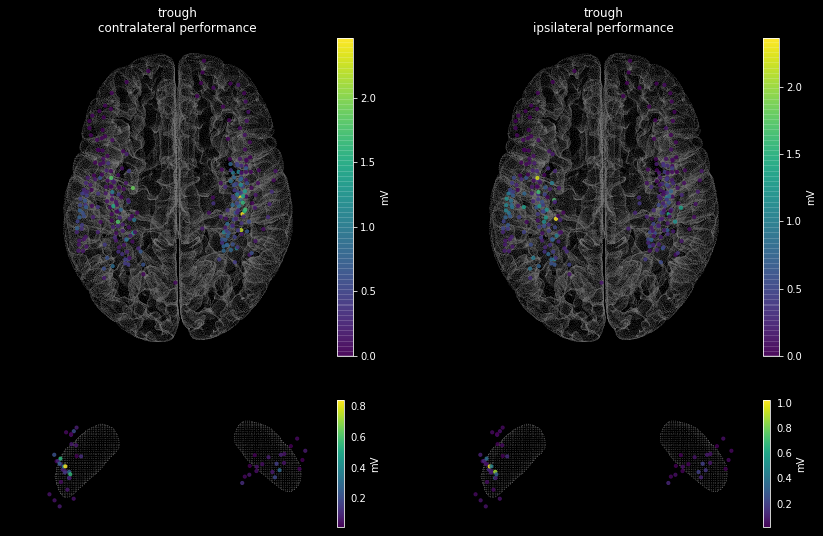

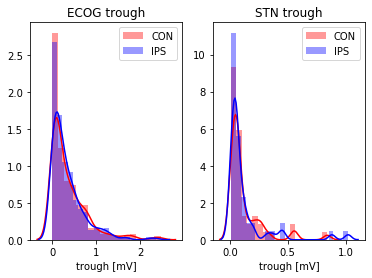

('interval', 'ms')


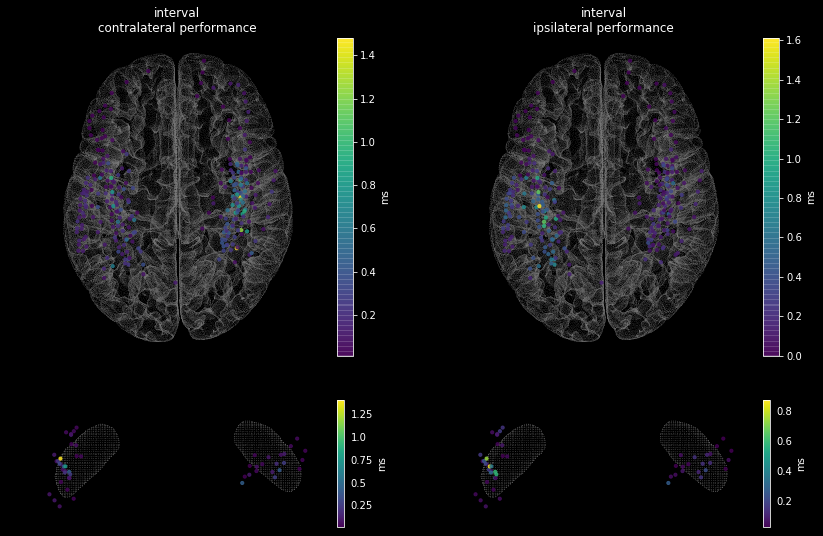

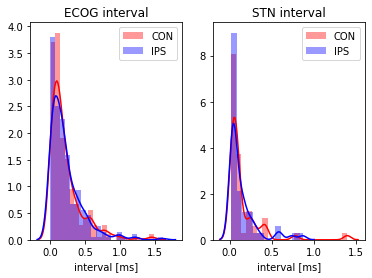

('prominence', 'mV')


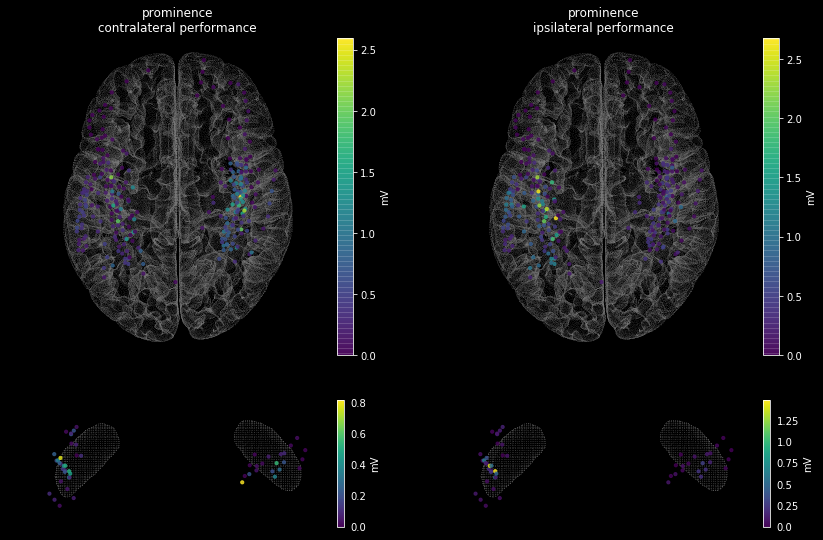

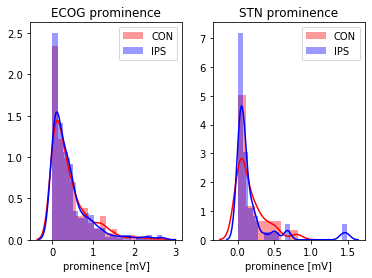

('rise_steepness', "mV'")


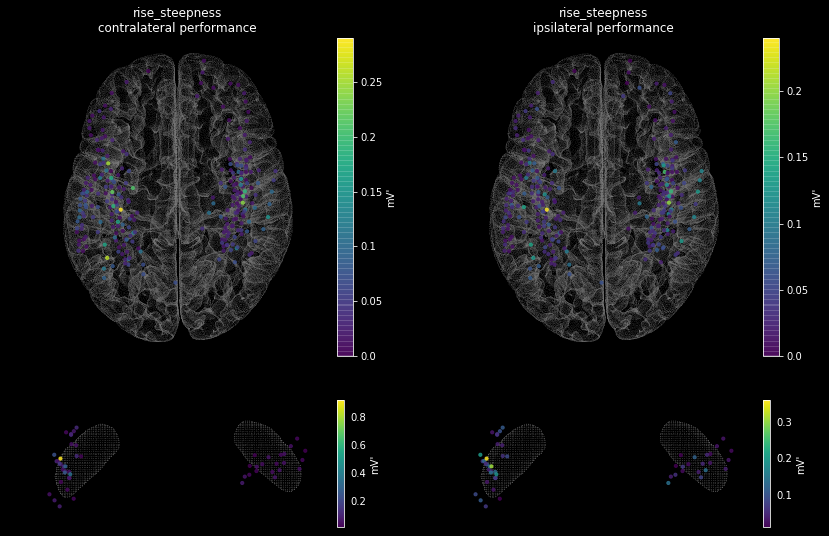

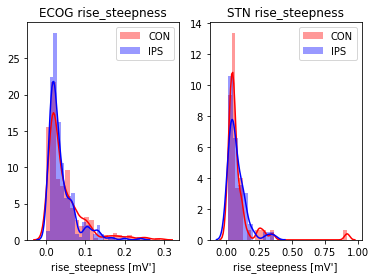

('rise_time', 'ms')


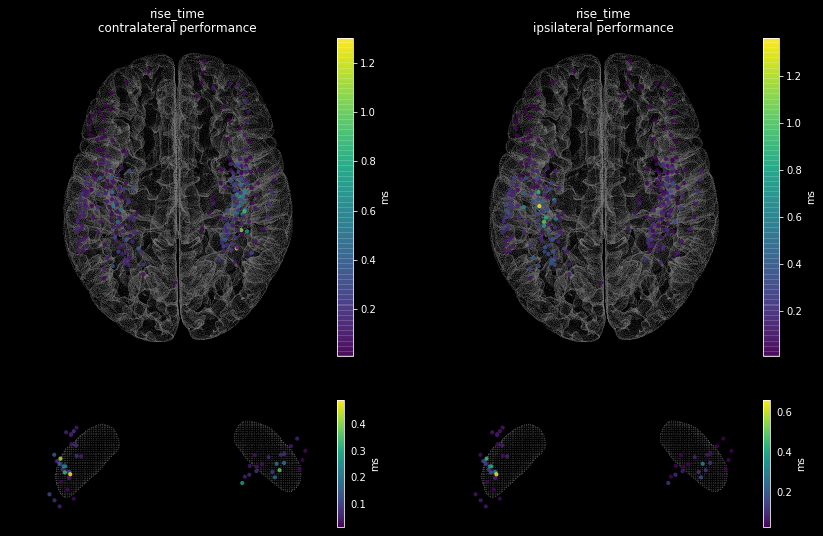

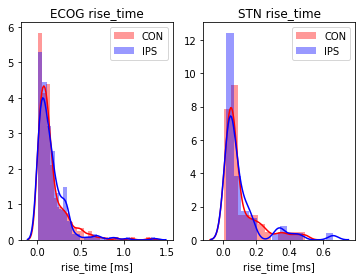

('decay_steepness', "mV'")


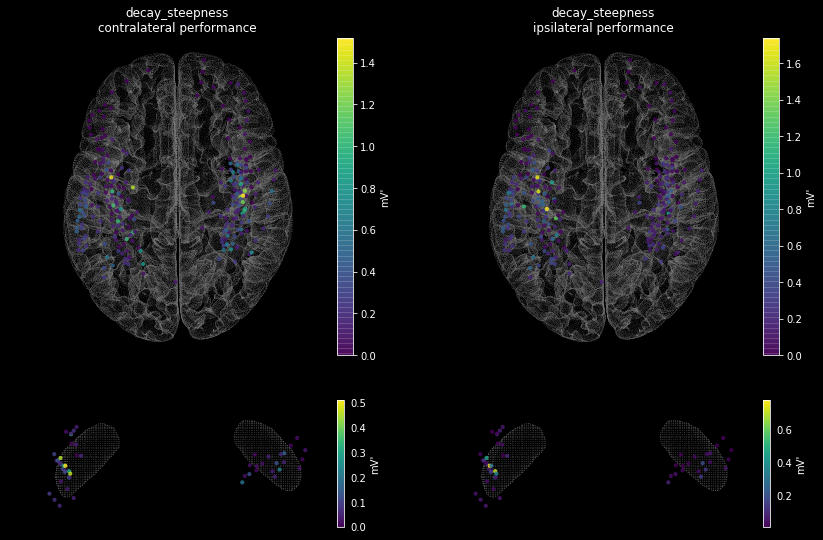

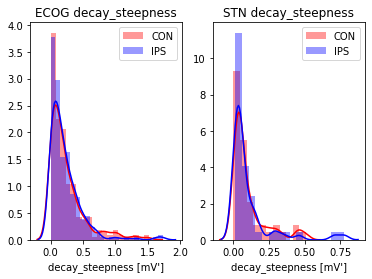

('slope_ratio', "mV'")


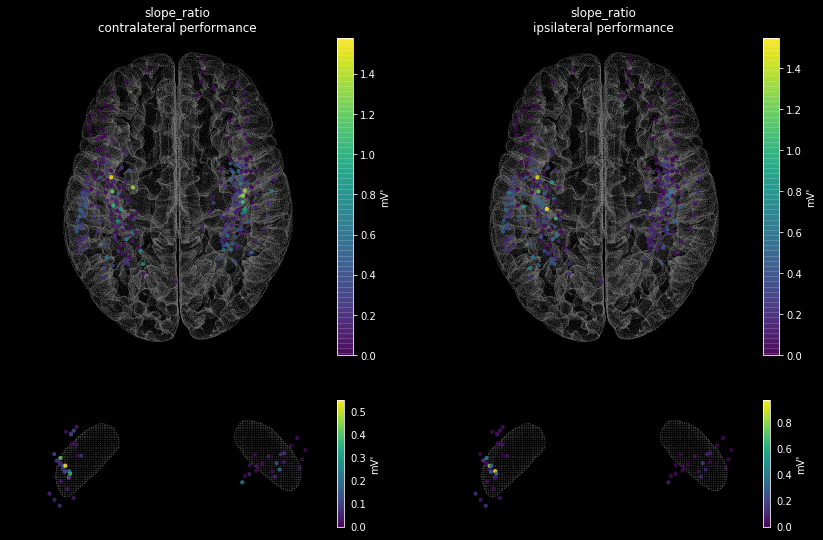

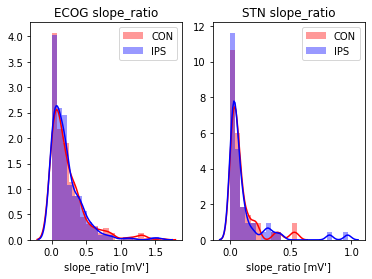

('decay_time', 'ms')


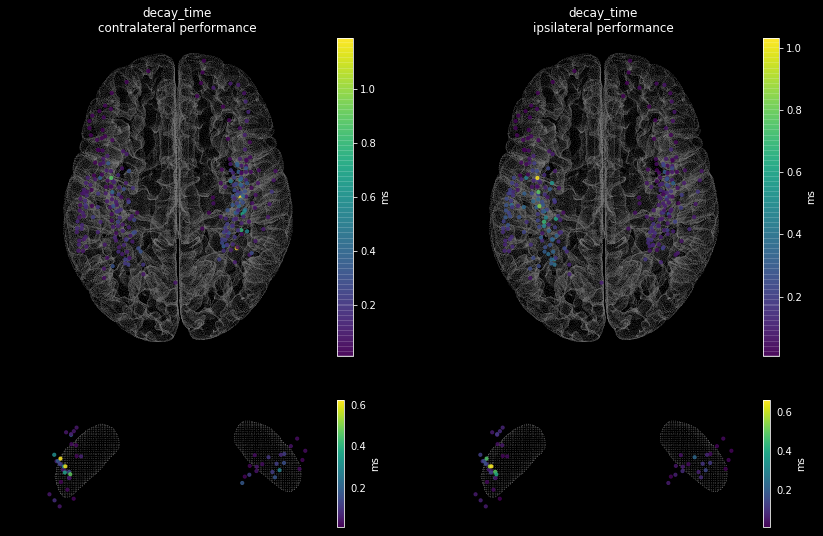

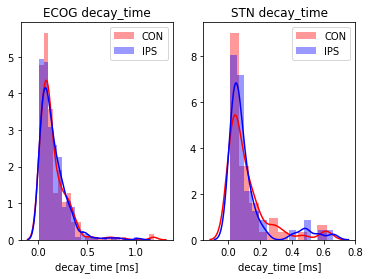

('width', 'ms')


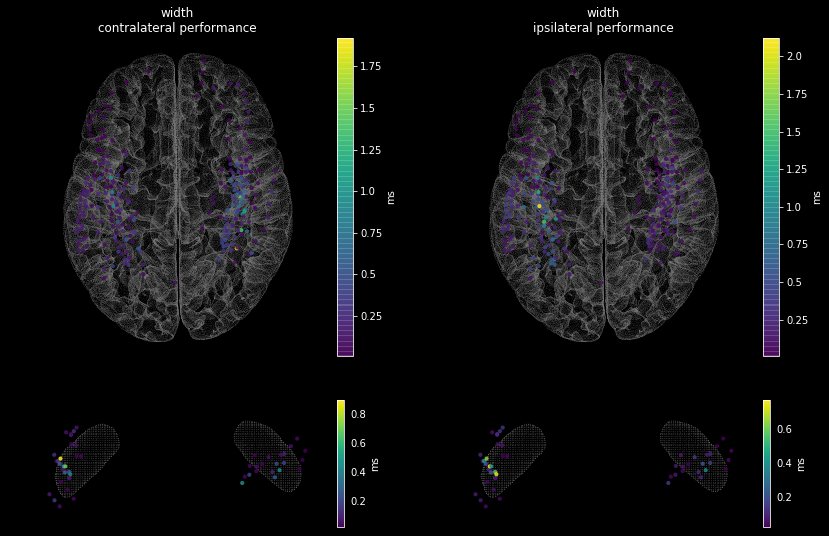

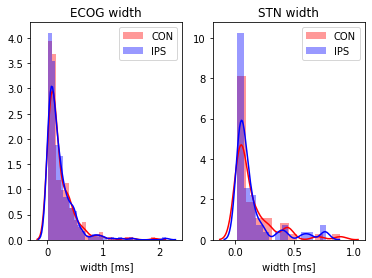

In [16]:
for measure in list(res["TROUGHS_CON"].keys()):
    print(measure)
    coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS = \
    get_arr_TROUGHS(measure)
    plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit=measure[1], meas=measure[0])
    plt.show()
    
    metric = measure[0]
    plt.subplot(121)
    sn.distplot(p_ECOG_CON, label='CON', color='red')
    sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
    plt.title("ECOG "+ metric)
    plt.xlabel(metric + " [" + measure[1]+"]")
    plt.legend()
    plt.subplot(122)
    sn.distplot(p_STN_CON, label='CON', color='red')
    sn.distplot(p_STN_IPS, label='IPS', color='blue')
    plt.title("STN "+ metric)
    plt.xlabel(metric + " [" + measure[1]+"]")
    plt.legend()
    plt.show()

### Peaks

('sharpness', 'mV')


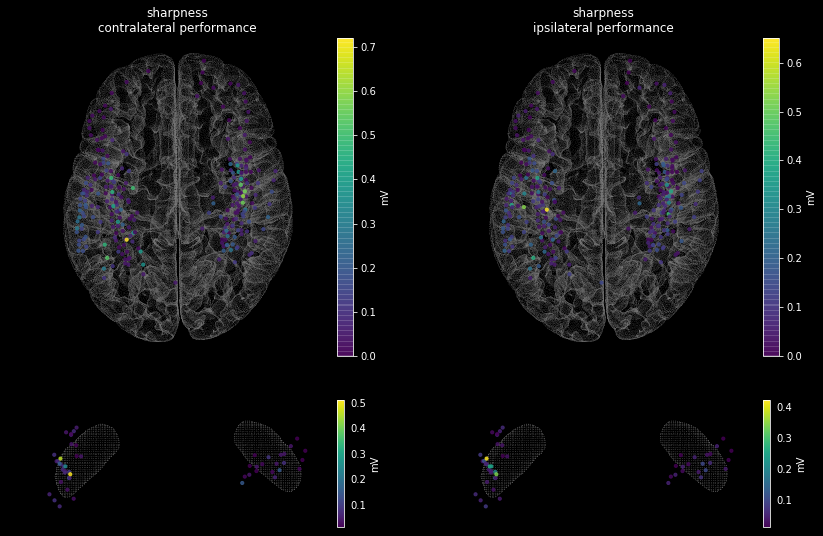

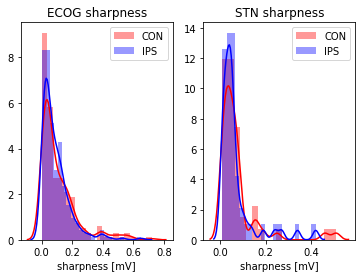

('peak', 'mV')


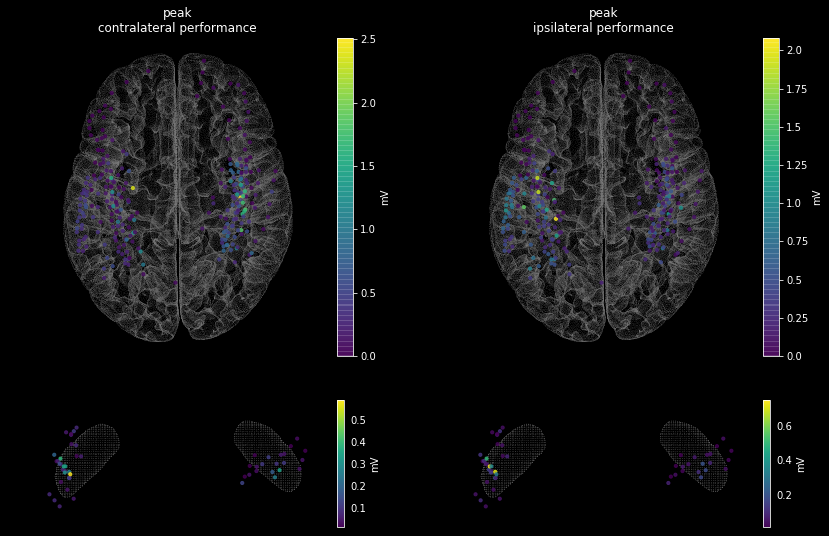

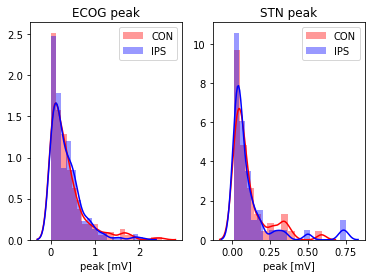

('interval', 'ms')


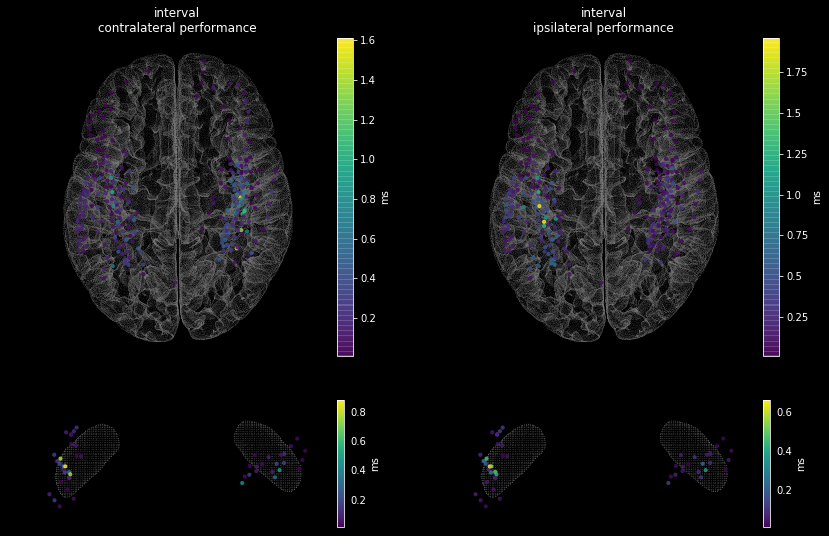

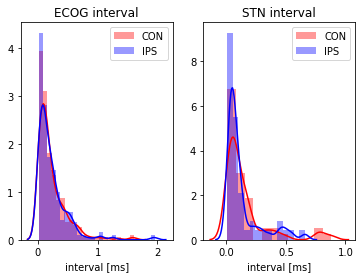

('prominence', 'mV')


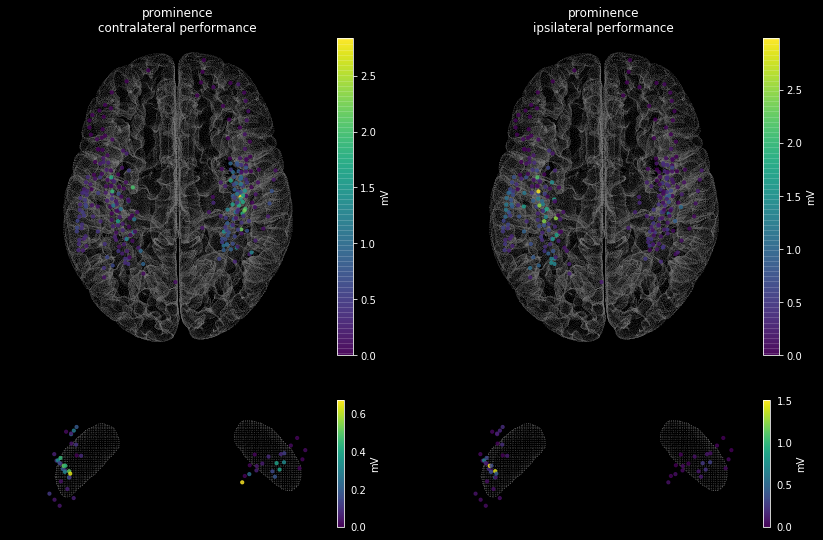

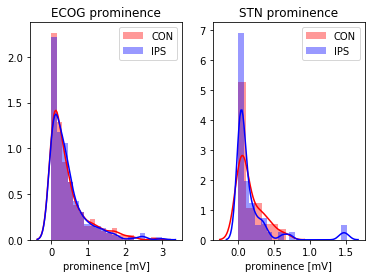

('rise_steepness', "mV'")


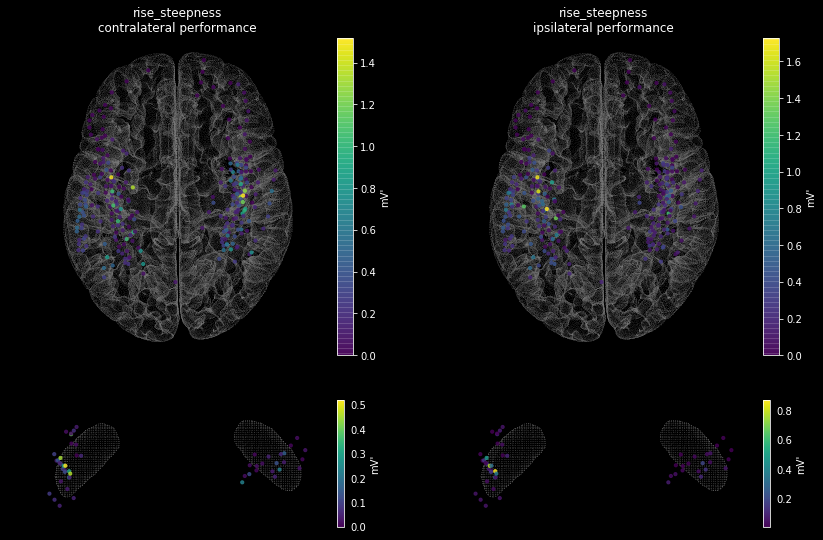

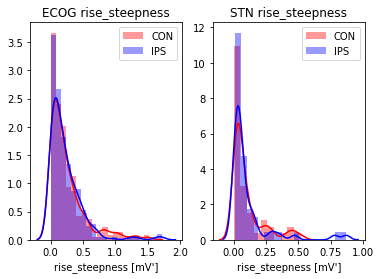

('rise_time', 'ms')


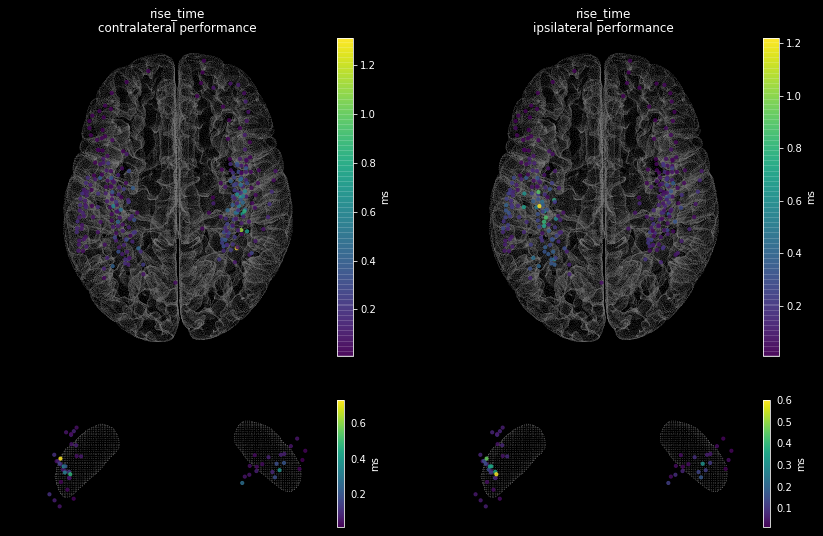

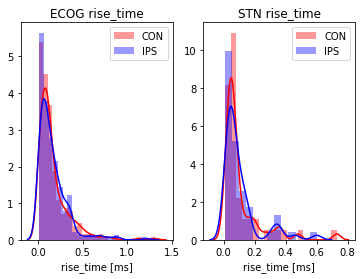

('decay_steepness', "mV'")


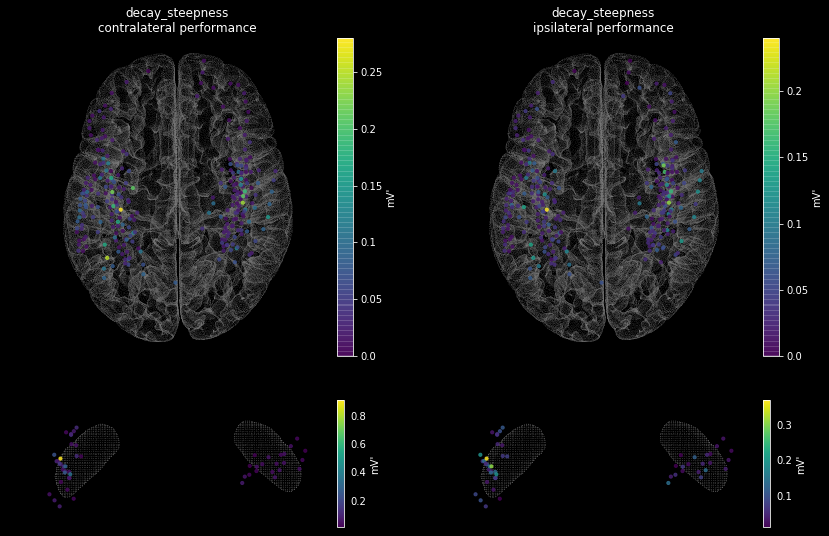

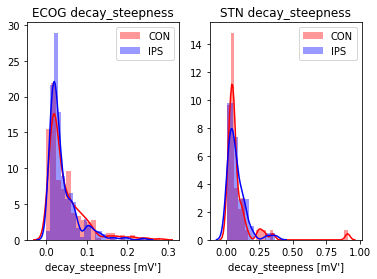

('slope_ratio', "mV'")


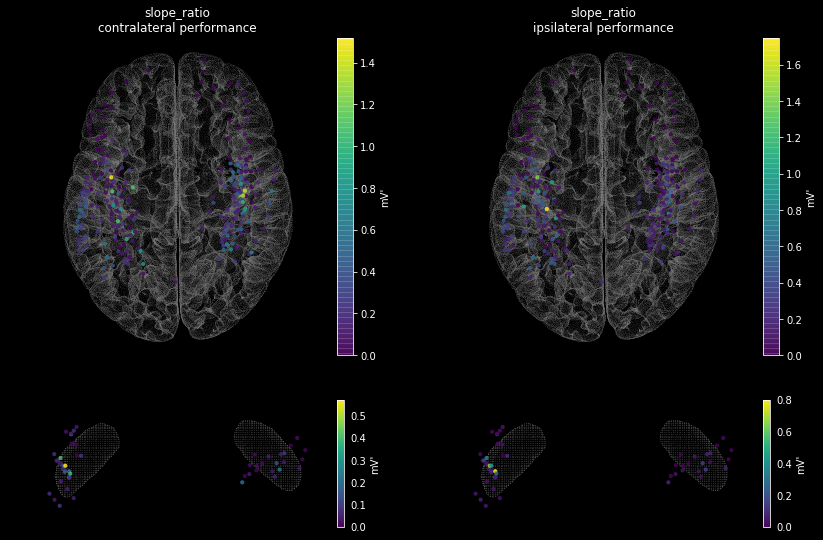

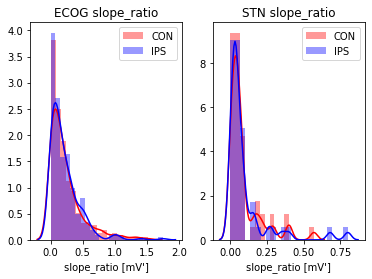

('decay_time', 'ms')


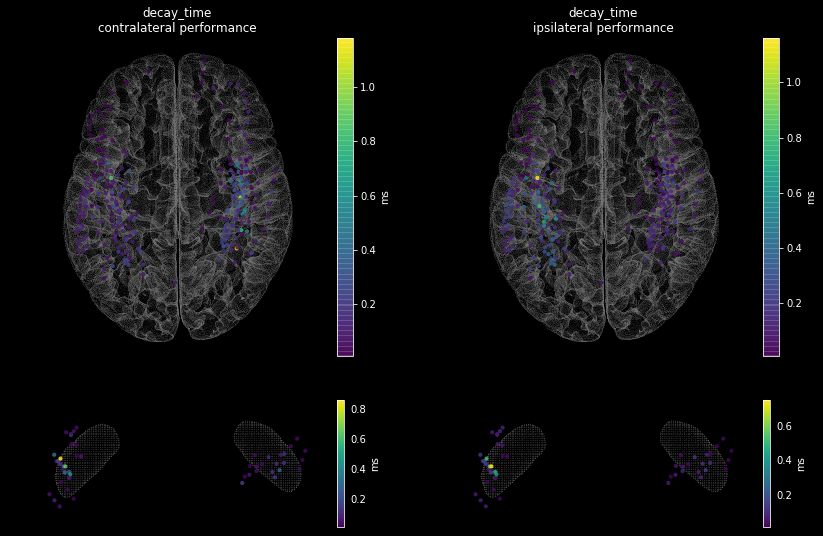

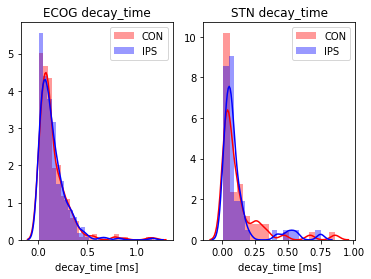

('width', 'ms')


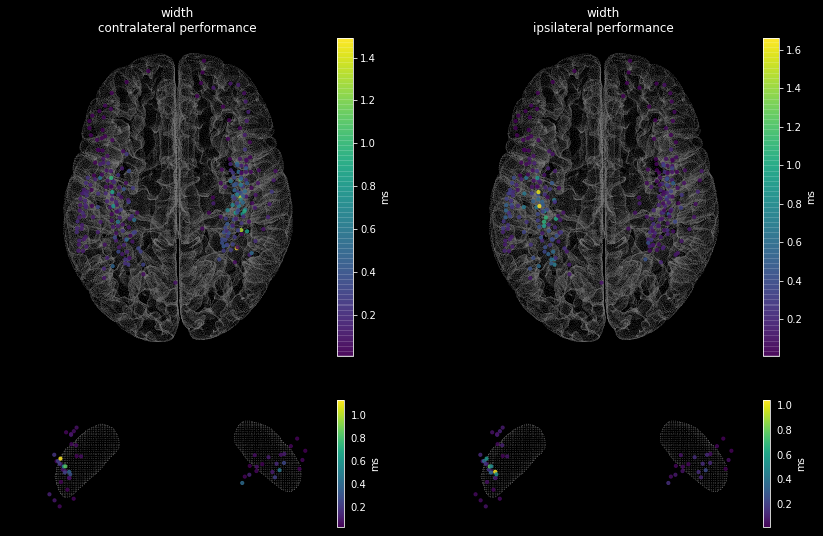

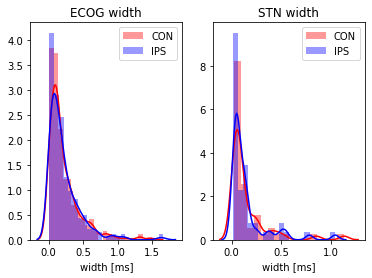

In [17]:
for measure in list(res["PEAKS_CON"].keys()):
    print(measure)
    coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS = \
    get_arr_PEAKS(measure)
    plot_all_in_one(coord_ECOG, coord_STN, p_ECOG_CON, p_ECOG_IPS, p_STN_CON, p_STN_IPS, unit=measure[1], meas=measure[0])
    plt.show()
    
    
    metric = measure[0]
    plt.subplot(121)
    sn.distplot(p_ECOG_CON, label='CON', color='red')
    sn.distplot(p_ECOG_IPS, label='IPS', color='blue')
    plt.title("ECOG "+ metric)
    plt.xlabel(metric + " [" + measure[1]+"]")
    plt.legend()
    plt.subplot(122)
    sn.distplot(p_STN_CON, label='CON', color='red')
    sn.distplot(p_STN_IPS, label='IPS', color='blue')
    plt.title("STN "+ metric)
    plt.xlabel(metric + " [" + measure[1]+"]")
    plt.legend()
    plt.show()